# Parameters Sweep Analysis

In [1]:
import evol_dynamics

In [2]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import tqdm
import itertools

In [3]:
import matplotlib.pyplot as plt
import matplotlib

cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import glob

**Clean data**

In [39]:
columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

In [40]:
csv_files = glob.glob('matlab/data/expected/*csv')

In [41]:
for file in tqdm.tqdm_notebook(csv_files):    
    df = pd.read_csv(file, header=None)
    df = df.drop_duplicates()
    df.columns = columns
    
    frequencies = []
    previous = 0
    for value in df['t'][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(10 ** 7 - previous)
    
    df['frequencies'] = frequencies
    
    df.to_csv(f"matlab/data/expected/clean_{file[21:]}", index=False)

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


**Generate individual plots - for each trial**

In [42]:
columns = ["y", "p", "q", "average cooperation rate", "average score", "t", "f"]

In [44]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13,
        }

In [45]:
csv_files = glob.glob('matlab/data/expected/clean_*')

In [60]:
file[:21] + file[27:]

'matlab/data/expected/S_-1.6_T_0.2_stochastic_0.csv'

In [62]:
for file in tqdm.notebook.tqdm(csv_files):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    text_file = open((file[:21] + file[27:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    
    mean_cooperation = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    mean_score = sum(df['average score'] * (df['frequencies'] / 10 ** 7))
    title = data[0].replace('\n', '')
    
    ps = []
    qs = []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
    
    fig, axes = plt.subplots(figsize=(10, 7));

    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes.imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")

    divider = make_axes_locatable(axes)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    title = data[0].replace("\n", "")
    axes.set_title(title)

    axes.set_xticks(np.linspace(0, 1, 2))
    axes.set_yticks(np.linspace(0, 1, 2))

    axes.text(.2, .9, f'mean cooperation: {round(mean_cooperation, 3)}', fontdict=font)
    axes.text(.2, .85, f'mean score: {round(mean_score, 3)}', fontdict=font)


    fig.savefig(f'matlab/images/{title}.pdf')
    plt.close(); 

**Generate plot across axis**

In [63]:
import numbers

In [64]:
Ss = [2, 1.6, 1.2, 0.8, 0.4, 0, -0.4, -0.8, -1.2, -1.6, -2]
Ts = [-1, -0.6, -0.2,  0.2,  0.6,  1,  1.4,  1.8,  2.2,  2.6,  3]

In [67]:
sorted_cvs_files = [f"matlab/data/expected/clean_S_{S}_T_{T}_stochastic_0.csv" for S in Ss for T in Ts]

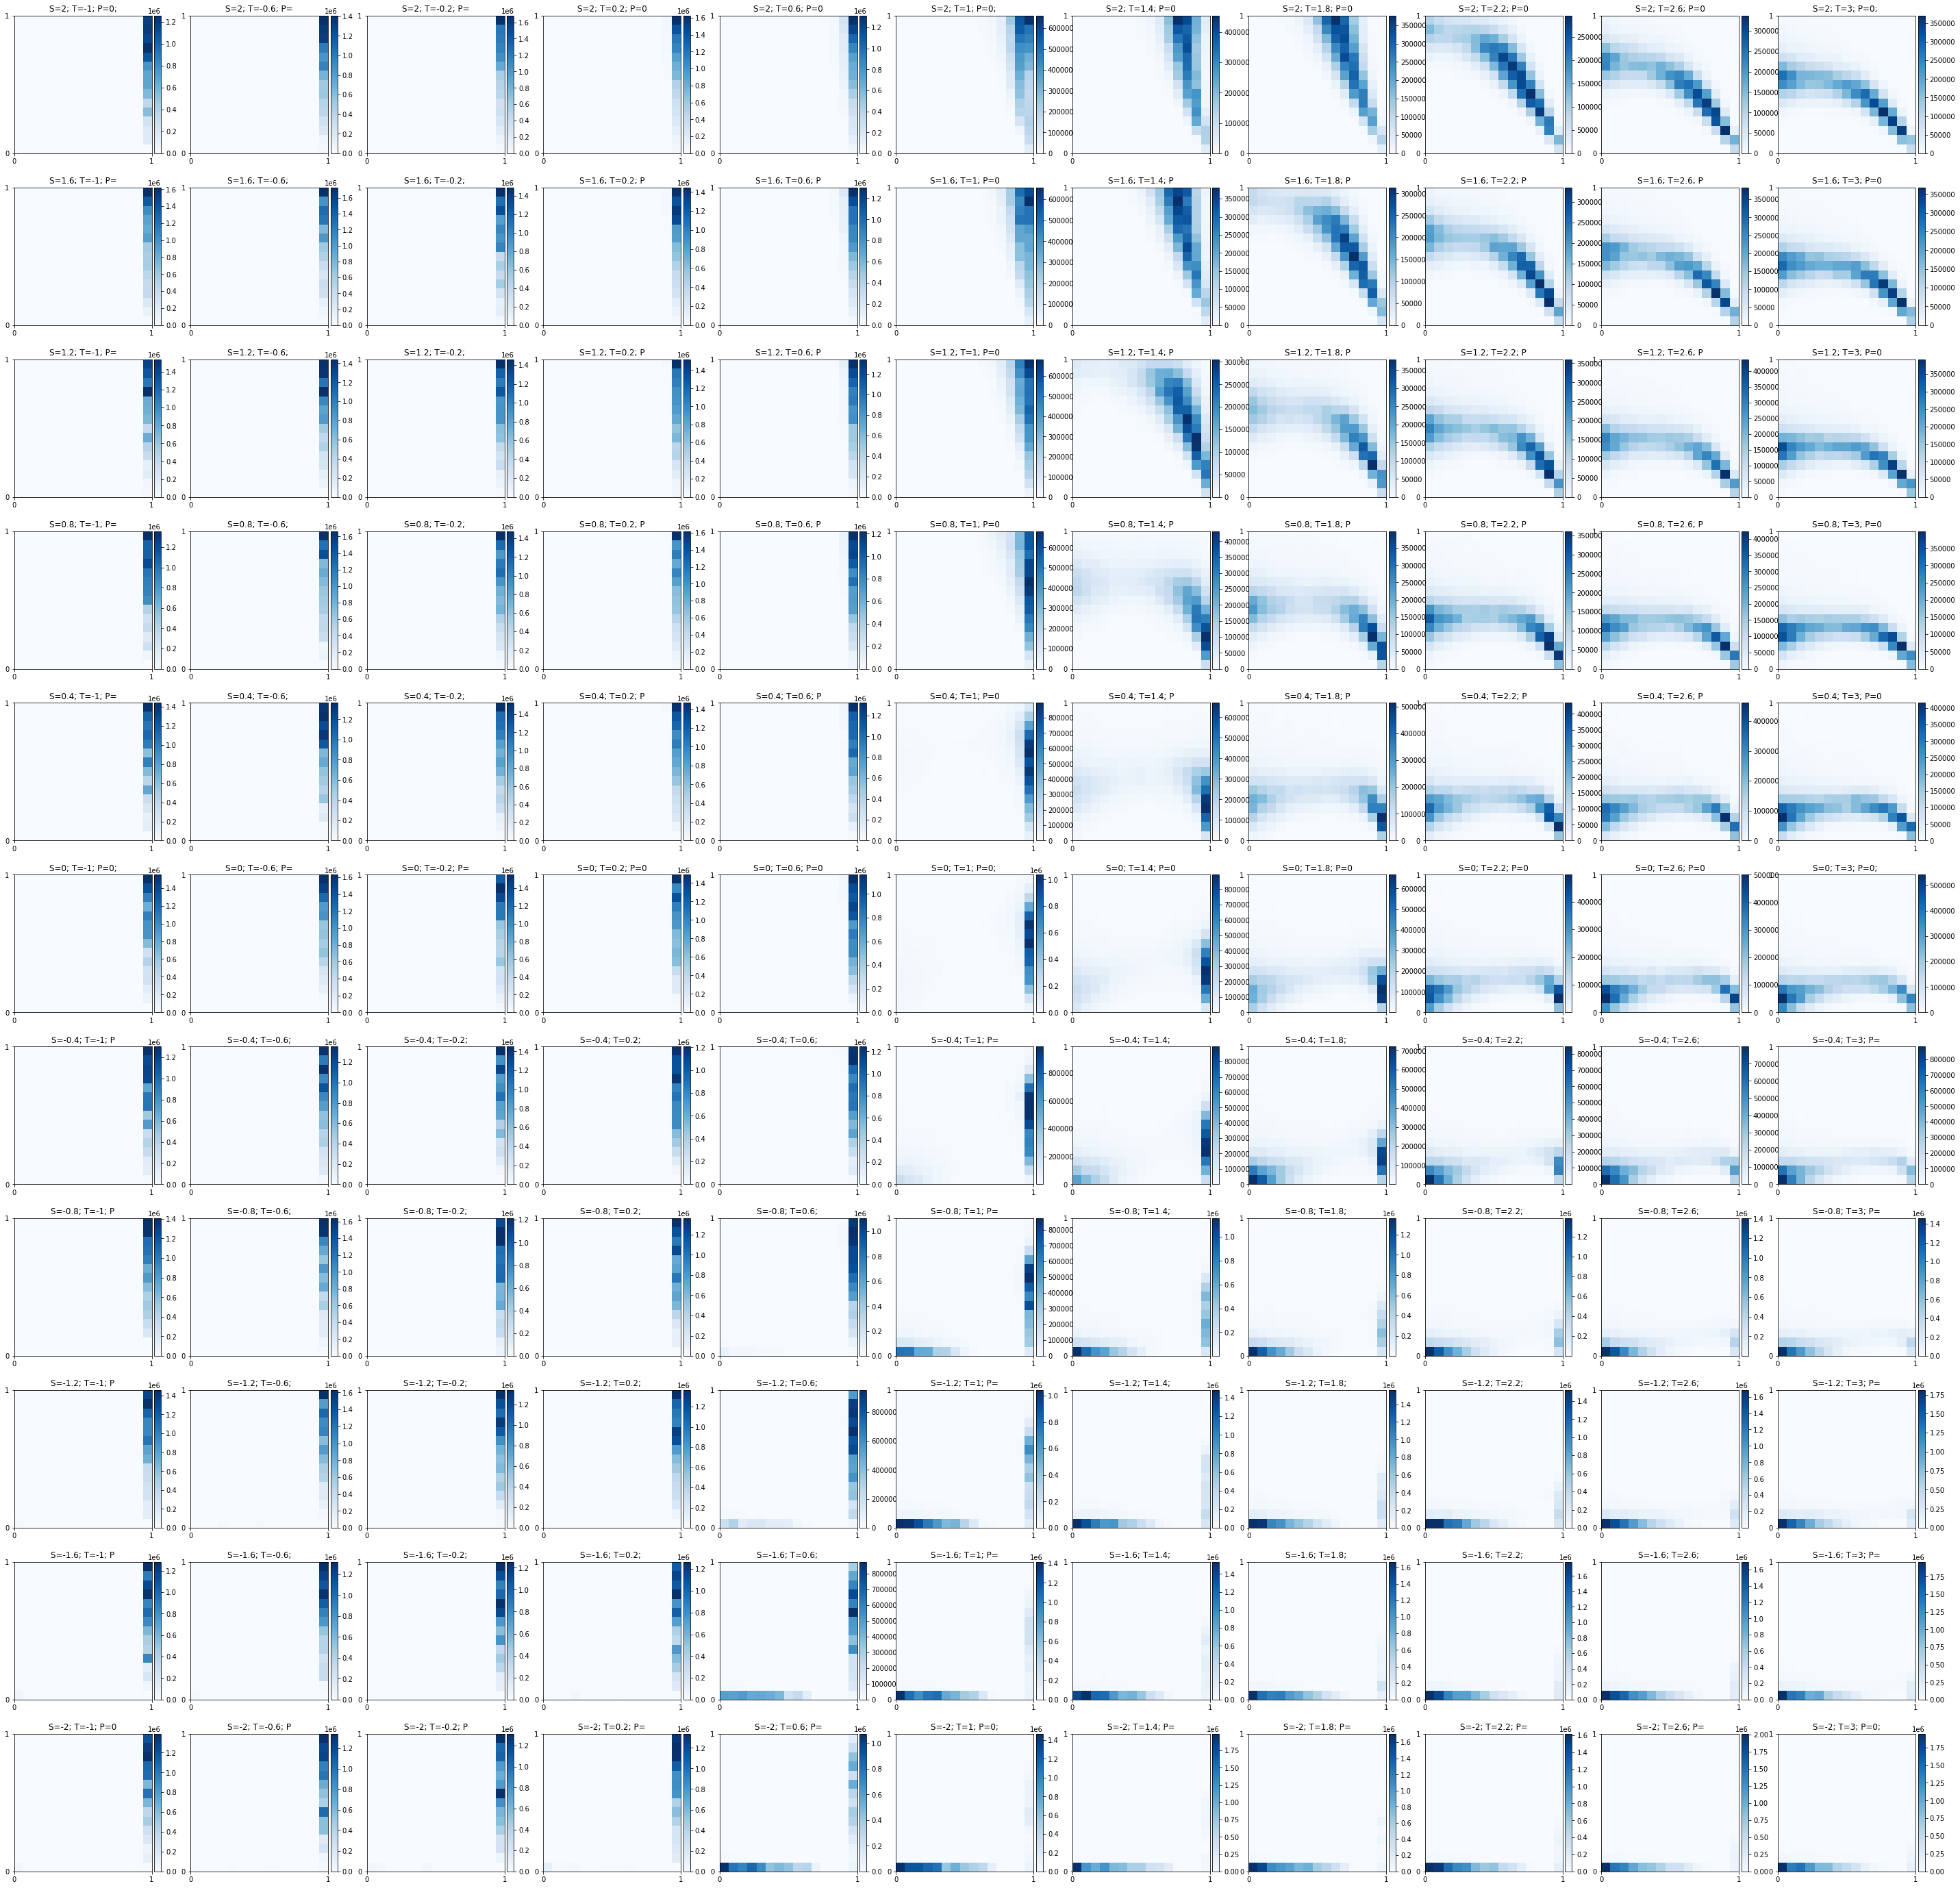

In [68]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    text_file = open((file[:21] + file[27:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
    
    title = data[0][5:20]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
        
fig.savefig("matlab/images/merged_plot.pdf")

In [69]:
cooperation_rates = np.zeros((11, 11))
scores = np.zeros((11, 11))

In [70]:
for i, file in enumerate(sorted_cvs_files):
    x = int(i / 11)
    y = i % 11
    
    df = pd.read_csv(file)
    
    cooperation_rates[int(x), int(y)] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

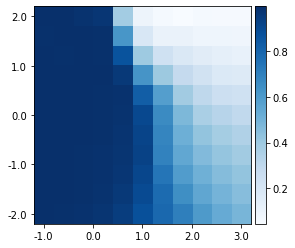

In [89]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_rates, origin="lower", cmap=cmaps[0])

axes.set_xticks(np.linspace(0, 10, 5))
axes.set_yticks(np.linspace(0, 10, 5))

axes.set_xticklabels(np.linspace(-1, 3, 5))
axes.set_yticklabels(np.linspace(-2, 2, 5))



divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');


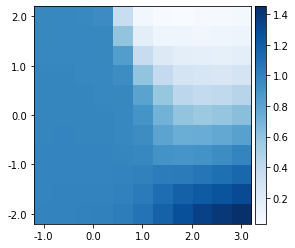

In [90]:
fig, axes = plt.subplots()

im = axes.imshow(scores, origin="lower", cmap=cmaps[0])

axes.set_xticks(np.linspace(0, 10, 5))
axes.set_yticks(np.linspace(0, 10, 5))

axes.set_xticklabels(np.linspace(-1, 3, 5))
axes.set_yticklabels(np.linspace(-2, 2, 5))



divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');



**Similar for stochastic payoffs**

In [131]:
csv_files = glob.glob('matlab/data/stochastic/*csv')

In [154]:
for file in tqdm.tqdm_notebook(csv_files):
    
    df = dd.read_csv(file,
                 header=None,
                 dtype=np.float64,
                 names=columns)
    
    text_file = open(file.replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    
    mean_cooperation = df['average cooperation rate'].mean()
    mean_score = df['average score'].mean()
    title = data[0].replace('\n', '')
    ps = df['p'].values.compute()
    qs = df['q'].values.compute()
    
    fig, axes = plt.subplots(figsize=(10, 7));

    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes.imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

    divider = make_axes_locatable(axes)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    title = data[0].replace("\n", "")
    axes.set_title(title)

    axes.set_xticks(np.linspace(0, 1, 2))
    axes.set_yticks(np.linspace(0, 1, 2))

    axes.text(.2, .9, f'mean cooperation: {round(mean_cooperation.compute(), 3)}', fontdict=font)
    axes.text(.2, .85, f'mean score: {round(mean_score.compute(), 3)}', fontdict=font)


    fig.savefig(f'matlab/images/{title}.pdf')
    plt.close(); 

In [155]:
sorted_cvs_files = [f"matlab/data/stochastic/S_{S}_T_{T}_stochastic_1.csv" for S in Ss for T in Ts]

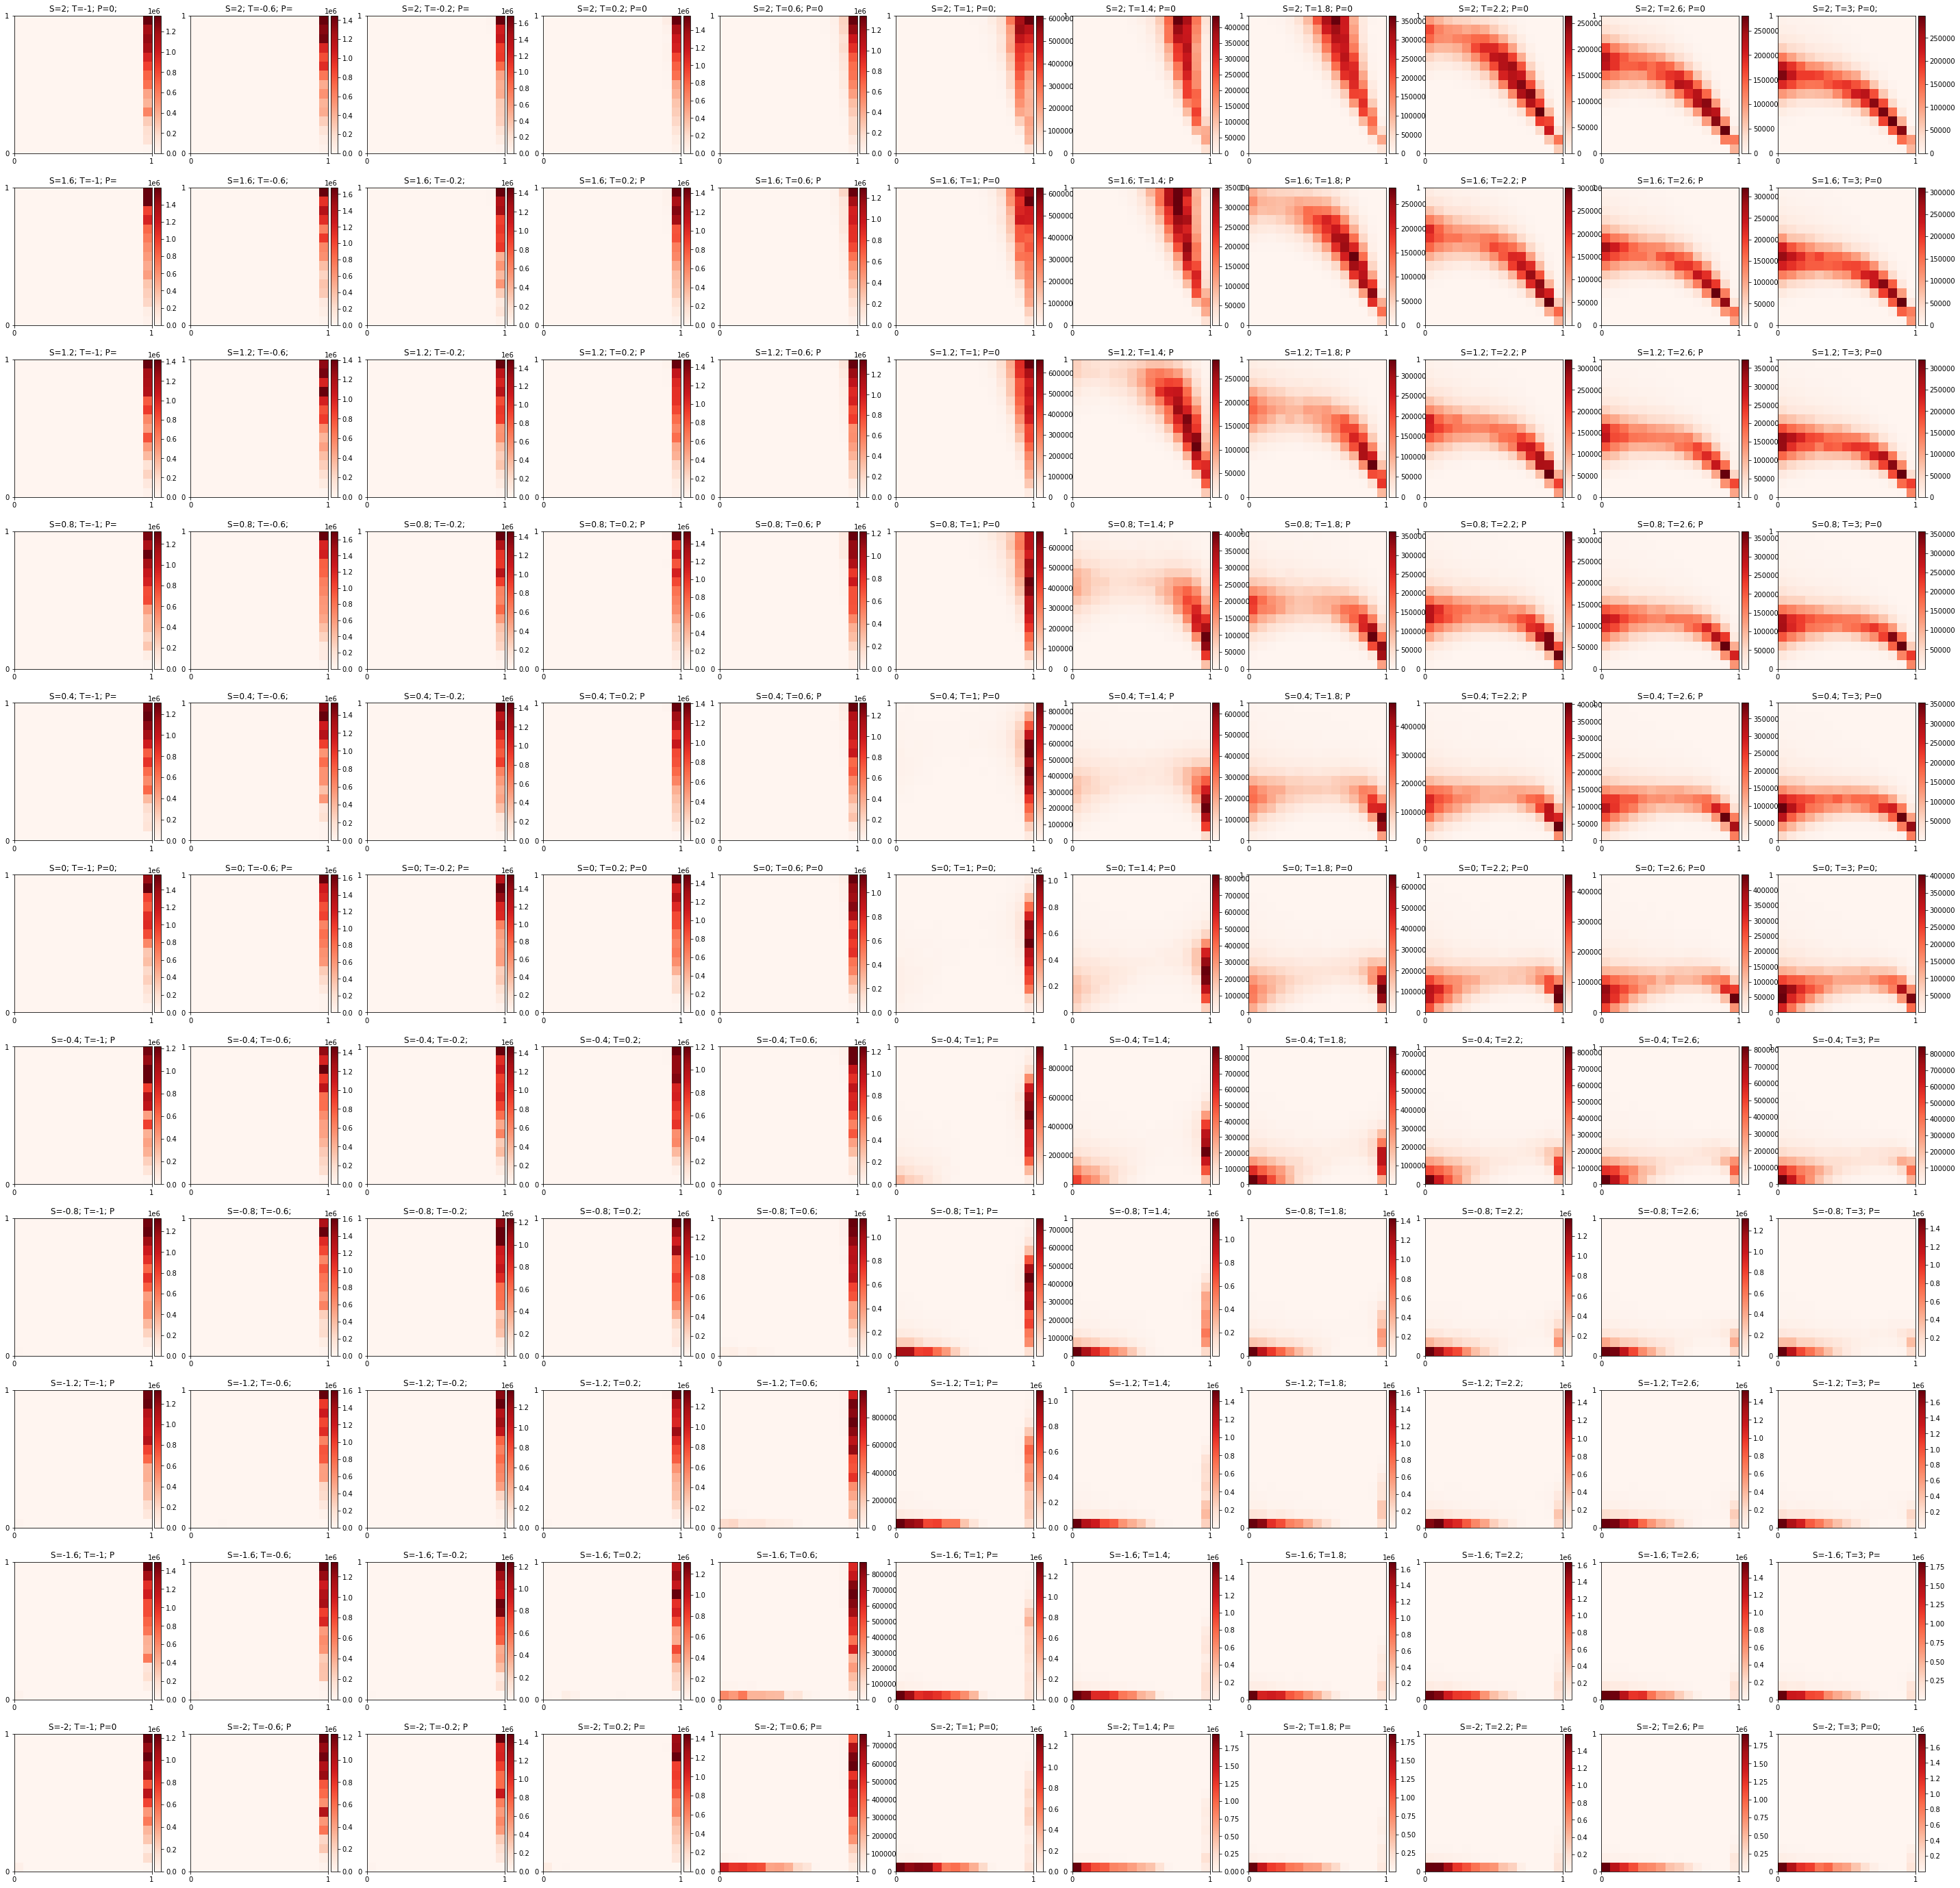

In [156]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files):
    
    df = dd.read_csv(file,
                 header=None,
                 dtype=np.float64,
                 names=columns)
    
    text_file = open(file.replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps = df['p'].values.compute()
    qs = df['q'].values.compute()
    title = data[0][5:20]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
fig.savefig("matlab/images/merged_plot_stochastic.pdf")

In [157]:
cooperation_rates_stoch = np.zeros((11, 11))
scores_stoch = np.zeros((11, 11))

In [158]:
for i, file in enumerate(sorted_cvs_files):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file,
             header=None,
             dtype=np.float64,
             names=columns)
    
    cooperation_rates_stoch[x, y] = df['average cooperation rate'].mean().compute()
    scores_stoch[x, y] = df['average score'].mean().compute()

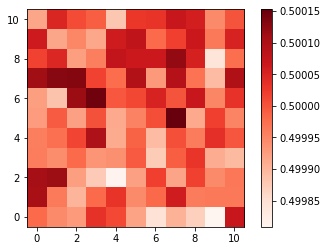

In [159]:
plt.imshow(cooperation_rates_stoch, origin="lower", cmap=cmaps[1])

plt.colorbar();

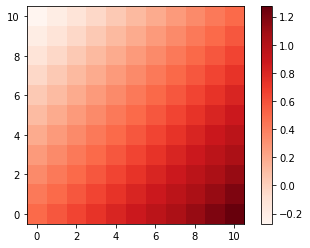

In [160]:
plt.imshow(scores_stoch, origin="lower", cmap=cmaps[1])

plt.colorbar();